## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
fullData_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
# Display the data table for preview
fullData_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [48]:
# Checking the number of mice.
miceNumber = fullData_df['Mouse ID'].count()
miceNumber

1893

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = fullData_df[fullData_df.duplicated(['Mouse ID','Timepoint'])]
duplicateMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 



In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedMice_df = fullData_df.drop_duplicates('Mouse ID')
cleanedMice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [52]:
# Checking the number of mice in the clean DataFrame.
cleanMice_number = cleanedMice_df['Mouse ID'].count()
cleanMice_number

249

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
miceMean = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
miceMedian = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
miceVar = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
miceStd = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
miceSem = fullData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
summaryMice_df = pd.DataFrame({'Mean':miceMean, 'Median':miceMedian, 'Variance':miceVar, 
                                   'Std. Deviation':miceStd, 'SEM':miceSem})
summaryMice_df


,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

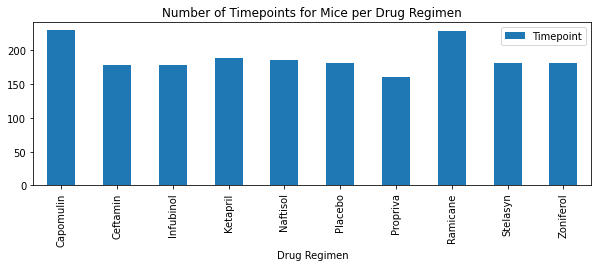

<Figure size 432x288 with 0 Axes>

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceTime = pd.DataFrame(fullData_df.groupby(['Drug Regimen']).count()).reset_index()

# Change DateFrame to 2 Columns
drugsData_df = miceTime[['Drug Regimen', 'Timepoint']]
drugsData_df = drugsData_df.set_index('Drug Regimen')

drugsData_df.plot(kind='bar',figsize=(10,3))

plt.title('Number of Timepoints for Mice per Drug Regimen')
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Timepoints')

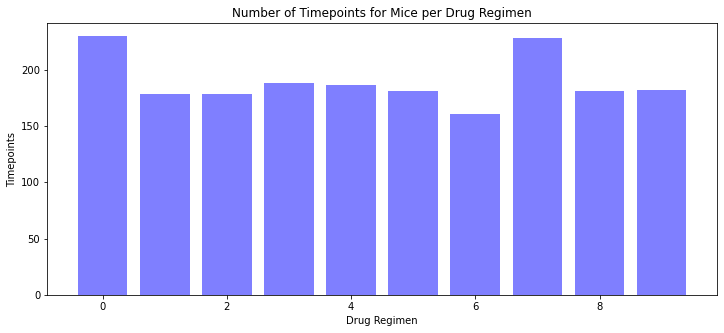

In [56]:
# Collect List of Drug Regimen
miceDrug_list = summaryMice_df.index.tolist()
# Create array based on Drug Regimen
drugCount = (fullData_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
# Create Chart
x_axis = np.arange(len(drugCount))
plt.figure(figsize=(12,5))
plt.bar(x_axis,drugCount,color='blue',alpha=.5,align='center')

plt.title('Number of Timepoints for Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

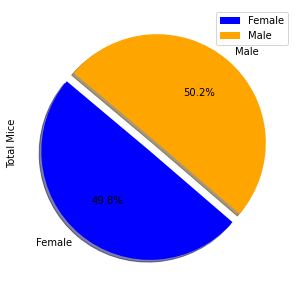

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group by Gender
miceGender_gb = fullData_df.groupby(['Mouse ID','Sex'])
miceGender_df = pd.DataFrame(miceGender_gb.size())

# Create DataFrame with Gender Totals
miceGender = pd.DataFrame(miceGender_df.groupby(['Sex']).count())
miceGender.columns = ['Total Mice']

# Calculate Percentages
miceGender["Percentage of Sex"] = (100*(miceGender["Total Mice"]/miceGender["Total Mice"].sum()))
miceGender["Percentage of Sex"] = miceGender["Percentage of Sex"]

# Plot Pie Chart
colors = ['blue', 'orange']
explode = (0.1, 0)
plot = miceGender.plot.pie(y= 'Total Mice', figsize=(5,5), colors = colors, 
                                 startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

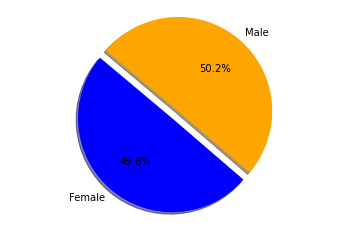

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Configure Pie Chart
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['blue', 'Orange']
explode = (0.1, 0)

# Plot Pie Chart 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sortData_df = fullData_df.sort_values(['Drug Regimen','Mouse ID','Timepoint'])
finalData_df = sortData_df.loc[sortData_df['Timepoint']==45]
finalData_df.head().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
topRegimens = pd.DataFrame(fullData_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
topRegimens_df = pd.merge(fullData_df, topRegimens, on='Mouse ID')
topRegimens_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    
    regimen_df = topRegimens_df.loc[topRegimens_df['Drug Regimen'] == regimen]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    finalVol_df = regimen_df.loc[regimen_df['Timepoint']==regimen_df['Max Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = finalVol_df['Tumor Volume (mm3)']
    tumorVol_list.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {regimen}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {regimen}: {lower_bound}')
    print(f'Upper Bound for {regimen}: {upper_bound}')
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(finalVol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (finalVol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {regimen} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


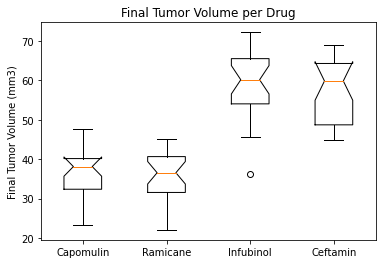

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalTumor = dict(marker='o',markerfacecolor='blue',markersize=5,markeredgecolor='black')

plt.boxplot(tumorVol_list,finalTumor)
plt.title('Final Tumor Volume per Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])

plt.show()

## Line and Scatter Plots

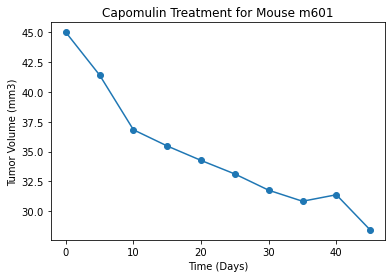

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseCap = fullData_df.loc[fullData_df['Mouse ID']=='m601']

plt.plot(mouseCap['Timepoint'], mouseCap['Tumor Volume (mm3)'],marker='o')
plt.title('Capomulin Treatment for Mouse m601')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

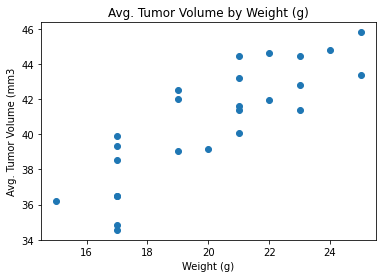

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weightCap = fullData_df.loc[fullData_df['Drug Regimen']=='Capomulin']

# Calculate Average
avgWeight = pd.DataFrame(weightCap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'Avg. Tumor Volume'})

# Merge and Drop Duplicates
avgWeight = pd.merge(weightCap,avgWeight,on='Mouse ID')
finalAvg_df = avgWeight[['Weight (g)','Avg. Tumor Volume']].drop_duplicates()
finalAvg_df

x = finalAvg_df['Weight (g)']
y = finalAvg_df['Avg. Tumor Volume']

plt.scatter(x,y)
plt.title('Avg. Tumor Volume by Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3')

plt.show()

## Correlation and Regression

The correlation between weight and avg. tumor volume on the Capomulin Regimen is 0.84.


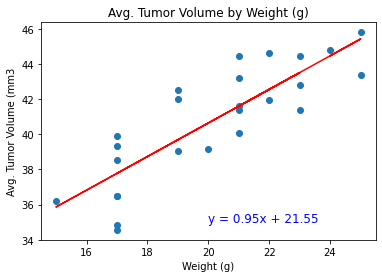

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weightCap = fullData_df.loc[fullData_df['Drug Regimen']=='Capomulin']

avgWeight = pd.DataFrame(weightCap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'Avg. Tumor Volume'})
avgWeight = pd.merge(weightCap,avgWeight,on='Mouse ID')
finalAvg_df = avgWeight[['Weight (g)','Avg. Tumor Volume']].drop_duplicates()
finalAvg_df

x = finalAvg_df['Weight (g)']
y = finalAvg_df['Avg. Tumor Volume']

# Calculate Correlation Coefficient
correlationCap = st.pearsonr(x,y)

print(f'The correlation between weight and avg. tumor volume on the Capomulin Regimen is {round(correlationCap[0],2)}.')

# Calculate Linear Regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
regressVal = x * slope + intercept
lineEq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regressVal, 'r-')

plt.annotate(lineEq,(20,35),fontsize=12,color='blue')

plt.title('Avg. Tumor Volume by Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3')

plt.show()